In [57]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

sns.set(style='darkgrid', palette='viridis', context='talk')

In [3]:
import datetime

In [4]:
datetime.date.today()

datetime.date(2022, 5, 24)

# Import

In [4]:
vivarium-ecoli/out/fbagd/4/2022-05-24 18:18:47.304050

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2219272253.py, line 1)

In [134]:
time = 4
# entry = '2022-04-11 09:34:01.360686' # original
# entry = '2022-04-11 10:12:59.182986' # uptake
# entry = '2022-04-11 10:28:09.721113' # carbon
# entry = '2022-04-11 10:59:58.572182' # futile cycle disabled
# entry = '2022-04-11 11:50:43.842592' # futile cycle enabled
# entry = '2022-04-11 13:42:58.572506' # carbon restriction
entry = '2022-05-24 18:18:47.304050'
folder = f'../out/fbagd/{time}/{entry}/'

In [135]:
output = np.load(folder + 'output.npy',allow_pickle='TRUE').item()
output = output['agents']['0']
fba = output['listeners']['fba_results']
mass = output['listeners']['mass']

In [136]:
s_matrix = np.load(folder + 's_matrix.npy',allow_pickle='TRUE')
stoichiometry = np.load(folder + 'stoichiometry.npy',allow_pickle='TRUE')

In [137]:
fba.keys()

dict_keys(['estimated_fluxes', 'estimated_homeostatic_dmdt', 'target_homeostatic_dmdt', 'target_kinetic_fluxes', 'estimated_exchange_dmdt', 'estimated_all_dmdt', 'maintenance_target', 'solution_fluxes', 'solution_dmdt', 'solution_residuals', 'time_per_step'])

In [138]:
times = [time - fba['time_per_step'][1] for time in fba['time_per_step'][1:]]
time_diff = [(times[i+1] - times[i])/2 for i in range(len(times)-1)]
index = [i for i in range(len(times)-1)]

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Real second to simulation second')

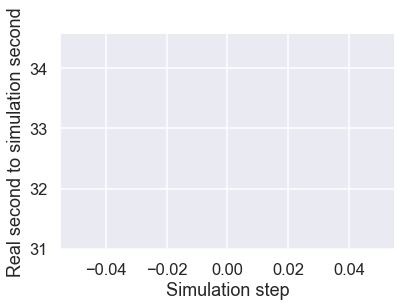

In [139]:
f = sns.lineplot(index, time_diff)
f.set_xlabel('Simulation step')
f.set_ylabel('Real second to simulation second')

In [140]:
fba['estimated_exchange_dmdt'].keys()

dict_keys(['GLC[p]', 'CH33ADO[c]', 'THYMINE[p]', 'HYPOXANTHINE[p]', 'WATER[p]', 'FE+2[p]', 'D-LACTATE[p]', 'CARBON-DIOXIDE[p]', 'FORMATE[p]', 'MI-PENTAKISPHOSPHATE[p]', 'INDOLE[p]', 'NI+2[p]', 'D-ALANINE[p]', 'OXYGEN-MOLECULE[p]', 'GLYCEROL[p]', 'METOH[p]', 'ACET[p]', 'Pi[p]', 'BETAINE[p]', 'CPD-534[p]', 'XANTHINE[p]', 'UNDECAPRENYL-DIPHOSPHATE[p]', 'SUC[p]', 'MG+2[p]', 'CL-[p]', 'MN+2[p]', 'NA+[p]', 'CPD-10774[p]', 'L-SELENOCYSTEINE[c]', 'CPD0-2167[c]', 'PROTON[p]', 'CA+2[p]', 'SULFATE[p]', 'CO+2[p]', 'URACIL[p]', 'CPD-564[c]', 'UREA[p]', 'BUTANAL[c]', 'GLYCOLALDEHYDE[c]', 'CPD-1772[c]', 'CPD-560[p]', 'CPD-239[p]', 'GLYCOLLATE[c]', 'ETOH[p]', 'AMMONIUM[c]', 'CPD-108[p]', 'HYDROGEN-MOLECULE[c]', 'ZN+2[p]', 'CARBON-MONOXIDE[p]', 'S-ADENOSYL-4-METHYLTHIO-2-OXOBUTANOATE[c]', 'K+[p]'])

In [141]:
sorted_exchange = pd.DataFrame(fba['estimated_exchange_dmdt']).sort_values(by=24, axis=1)
sorted_exchange.head()

KeyError: 24

In [142]:
sns.catplot(y="Exchange count", x="Molecule", data=sorted_exchange.iloc[:,0:5].melt(var_name="Molecule", value_name="Exchange count"), aspect=2)

NameError: name 'sorted_exchange' is not defined

In [143]:
sns.catplot(sorted_exchange.iloc[:, 0:5])

NameError: name 'sorted_exchange' is not defined

In [144]:
# fba['solution_residuals']['futile_cycle']

# Mass

<AxesSubplot:>

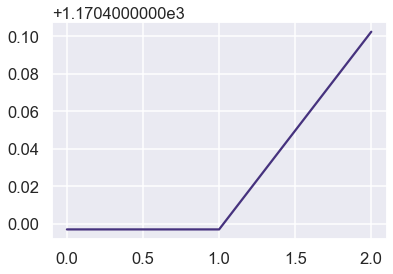

In [145]:
sns.lineplot(x=[i for i in range(len(mass['cell_mass']))],y=mass['cell_mass'])

# Meeting homeostatic objective

In [146]:
df1 = pd.DataFrame(fba['estimated_homeostatic_dmdt'])
df1.head()
# df1

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,1,1,1,...,-1,0,0,0,0,0,0,0,0,0
1,84,-42,7,-26,-10,-16,336,-17,32,-174,...,55,9,0,13,0,0,-5,-30,15,87


In [147]:
df1 = df1.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='update')


In [148]:
pd.DataFrame(fba['target_homeostatic_dmdt']).head()

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,1,1,1,...,-1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,361,0,0,0,...,-1,0,0,0,0,0,0,32,22,6


In [149]:
df2 = pd.DataFrame(fba['target_homeostatic_dmdt'])
df2 = df2.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='target')
df2

,index,timestep,target
0,2-3-DIHYDROXYBENZOATE[c],0,0
1,2-KETOGLUTARATE[c],0,0
2,2-PG[c],0,0
3,2K-4CH3-PENTANOATE[c],0,0
4,4-AMINO-BUTYRATE[c],0,0
...,...,...,...
337,MN+2[p],1,0
338,NA+[p],1,0
339,OXYGEN-MOLECULE[p],1,32
340,CA+2[p],1,22


In [150]:
df3 = df1.merge(df2, left_on=['index', 'timestep'], right_on=['index', 'timestep'])
# df3[df3['timestep'] == 900].T
df3

df3['update'] = df3['update'].abs() 
df3['target'] = df3['target'].abs() 

df3['update'] = np.log10(df3['update'])
df3['target'] = np.log10(df3['target'])
df3['diff'] = df3['target'] - df3['update']

df3

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,timestep,update,target,diff
0,2-3-DIHYDROXYBENZOATE[c],0,-inf,-inf,NaN
1,2-KETOGLUTARATE[c],0,-inf,-inf,NaN
2,2-PG[c],0,-inf,-inf,NaN
3,2K-4CH3-PENTANOATE[c],0,-inf,-inf,NaN
4,4-AMINO-BUTYRATE[c],0,-inf,-inf,NaN
...,...,...,...,...,...
337,MN+2[p],1,-inf,-inf,NaN
338,NA+[p],1,0.698970,-inf,-inf
339,OXYGEN-MOLECULE[p],1,1.477121,1.505150,0.028029
340,CA+2[p],1,1.176091,1.342423,0.166331


In [151]:
df3_subset = df3[df3['timestep'].isin([0, 1, 2, 10, 24])]

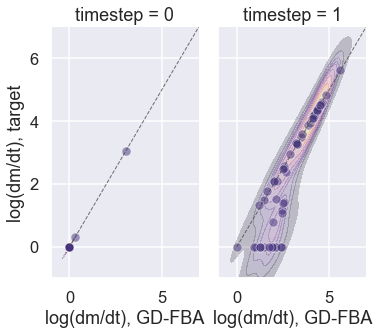

In [152]:
g = sns.FacetGrid(df3_subset, col="timestep", col_wrap=5, aspect=0.5, height=5, xlim=(-1,7), ylim=(-1,7))
g.map(sns.kdeplot, "update", "target", cmap="inferno", alpha=0.2, fill=True)
g.map(sns.scatterplot, "update", "target", alpha=0.5)
g.set_axis_labels("log(dm/dt), GD-FBA","log(dm/dt), target")

for ax in g.axes:
    ax.plot([0, 9], [0, 9], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    

plt.margins(0,0)

## Outliers?

In [153]:
df4 = df3.loc[df3['timestep'] == 25].reset_index(drop=True)
outliers = list(df4.loc[df4['diff']>0.5, 'index'])

<AxesSubplot:>

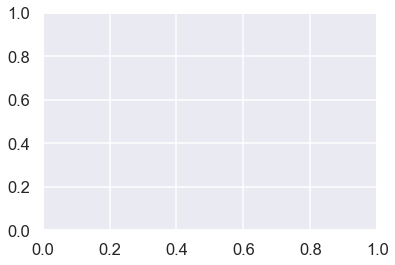

In [154]:
sns.histplot(x='diff', data=df4)

In [155]:
outliers

[]

In [156]:
bulk.loc[:, outliers]

NameError: name 'bulk' is not defined

Doesn't look like they're going into negative at least. Are they being used?

## Usage

In [157]:
df5 = df3.loc[df3['timestep'] > 25].reset_index(drop=True)
outlier_time = df5[df5['index'].isin(outliers)]

<AxesSubplot:>

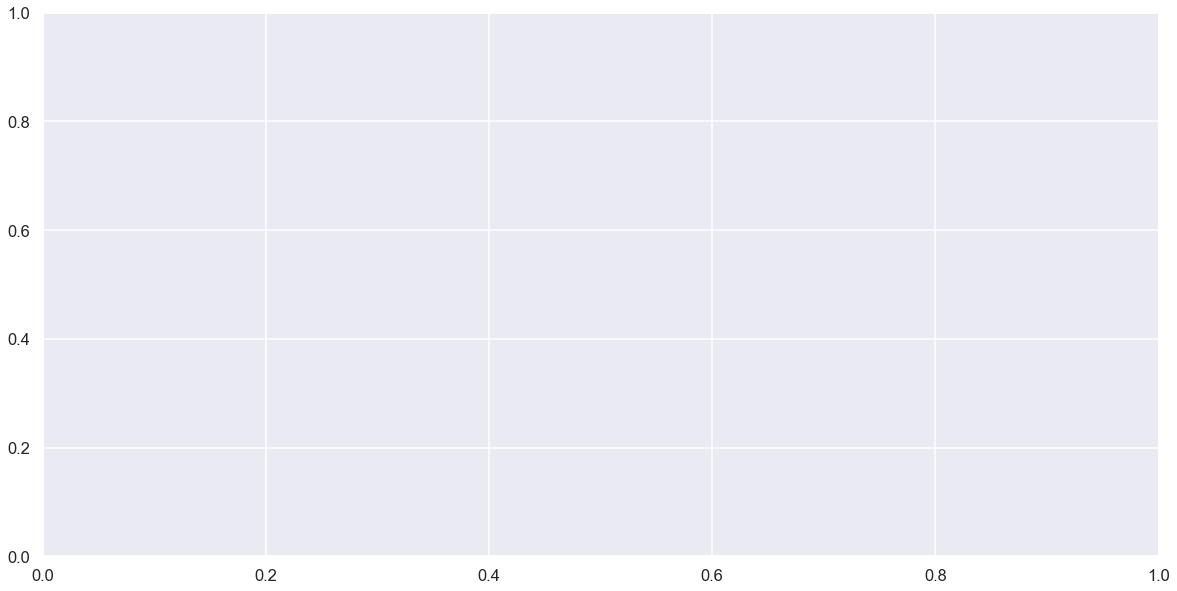

In [158]:
plt.figure(figsize=[20,10])
sns.lineplot(x='timestep', y='diff', hue='index', data=outlier_time, legend=False)

I would guess that they're just not incentivized enough to reach their target completely. 

# Glucose transport

In [159]:


stoichiometry[1]

{'reaction id': '1.1.1.127-RXN',
 'stoichiometry': {'2-DEHYDRO-3-DEOXY-D-GLUCONATE[c]': -1,
  'NAD[c]': -1,
  'CPD-343[c]': 1,
  'NADH[c]': 1,
  'PROTON[c]': 1},
 'is reversible': True,
 'enzyme': ['KDUD-MONOMER[c]']}

In [160]:
estimated_fluxes = pd.DataFrame(fba['estimated_fluxes'])
estimated_fluxes

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,2,0,0,2,-7,0,0,0,...,0,27726,-33845,6119,0,0,-3,0,-1,1971173
1,-12,-17,88,16,9,-1,0,-19,0,-1,...,5,27723,-33851,6116,35,-5,-2,75,55,7128364


In [161]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])
cycle = fluxes.loc[:,['RXN0-7209-GLC//GLC.9.','RXN0-7247-GLC//GLC.9.']]
cycle.head()

cycle.columns = ['A->B', 'B->A']

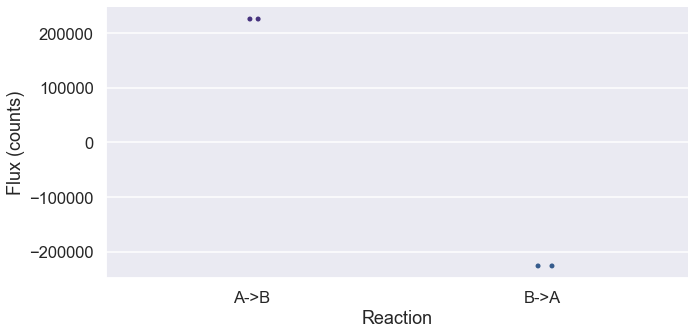

In [162]:
sns.catplot(y="Flux (counts)", x="Reaction", data=cycle.melt(var_name="Reaction", value_name="Flux (counts)"), aspect=2)

In [163]:
for reaction in stoichiometry:
    if 'GLC[p]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')
        
# for reaction in stoichiometry:
#     if 'GLC[p]' in reaction['stoichiometry'].keys():
#         print(reaction['reaction id'], reaction['stoichiometry'],sep='\n')

3.2.1.21-RXN-Beta-D-glucosides/WATER//Non-Glucosylated-Glucose-Acceptors/GLC.64.
{'Beta-D-glucosides[p]': -1, 'WATER[p]': -1, 'Non-Glucosylated-Glucose-Acceptors[p]': 1, 'GLC[p]': 1}
[0, 6]
GLUCOSE-1-PHOSPHAT-RXN[CCO-PERI-BAC]-GLC-1-P/WATER//GLC/Pi.36.
{'GLC-1-P[p]': -1, 'WATER[p]': -1, 'GLC[p]': 1, 'Pi[p]': 1}
[-21, -17]
GLUCOSE-1-PHOSPHAT-RXN[CCO-PERI-BAC]-GLC-1-P/WATER//GLC/Pi.36.__GLUCOSE-1-PHOSPHAT-CPLX
{'GLC-1-P[p]': -1, 'WATER[p]': -1, 'GLC[p]': 1, 'Pi[p]': 1}
[-21, -17]
RXN0-6373-GLC/UBIQUINONE-8//GLC-D-LACTONE/CPD-9956.41.
{'GLC[p]': -1, 'UBIQUINONE-8[i]': -1, 'GLC-D-LACTONE[p]': 1, 'CPD-9956[i]': 1}
[0, 13]
RXN0-6418
{'GLC[p]': -1, 'D-Glucose[p]': 1}
[0, 40]
RXN0-6418-GLC//CPD-15374.15.
{'GLC[p]': -1, 'CPD-15374[p]': 1}
[0, 40]
RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.
{'GLC[p]': -1, 'PROTON[p]': -1, 'ALPHA-GLUCOSE[c]': 1, 'PROTON[c]': 1}
[0, 0]
RXN0-7077-GLC/PROTON//GLC/PROTON.23.
{'GLC[p]': -1, 'PROTON[p]': -1, 'GLC[c]': 1, 'PROTON[c]': 1}
[0, 0]
RXN0-7077-GLC/PROTON//

We should look at the following:

In [164]:
glucose_transport_reactions = ['TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.',
                               'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.',
                               'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.',
                               'RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.',
                               'RXN0-7077-GLC/PROTON//Glucopyranose/PROTON.33.',
                               'RXN0-7077-GLC/PROTON//GLC/PROTON.23.',
                               'TRANS-RXN0-574-GLC//GLC.9.',
                               'TRANS-RXN0-574-GLC//Glucopyranose.19.']

In [165]:
for reaction in stoichiometry:
    if reaction['reaction id'] in glucose_transport_reactions:
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.
{'GLC[p]': -1, 'PROTON[p]': -1, 'ALPHA-GLUCOSE[c]': 1, 'PROTON[c]': 1}
[0, 0]
RXN0-7077-GLC/PROTON//GLC/PROTON.23.
{'GLC[p]': -1, 'PROTON[p]': -1, 'GLC[c]': 1, 'PROTON[c]': 1}
[0, 0]
RXN0-7077-GLC/PROTON//Glucopyranose/PROTON.33.
{'GLC[p]': -1, 'PROTON[p]': -1, 'Glucopyranose[c]': 1, 'PROTON[c]': 1}
[0, 0]
TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.
{'PTSH-PHOSPHORYLATED[c]': -1, 'GLC[p]': -1, 'ALPHA-GLC-6-P[c]': 1, 'PTSH-MONOMER[c]': 1}
[487080, 769590]
TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.
{'PTSH-PHOSPHORYLATED[c]': -1, 'GLC[p]': -1, 'D-glucopyranose-6-phosphate[c]': 1, 'PTSH-MONOMER[c]': 1}
[244899, 760845]
TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.
{'PTSH-PHOSPHORYLATED[c]': -1, 'GLC[p]': -1, 'GLC-6-P[c]': 1, 'PTSH-MONOMER[c]': 1}
[306368, 769313]
TRANS-RXN0-574-GLC//GLC.9.
{'GLC[p]': -1, 'GLC[c]': 1}
[0, 0]
TRANS-RXN0-574-GLC//Glucopyranose.19

# How much glucose is being used?

In [166]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])
influx = fluxes.loc[:,glucose_transport_reactions]
influx.head()

influx.columns = ['PTS-1', 'PTS-2', 'PTS-3', 'DIF-1', 'DIF-2', 'DIF-3', 'DIF-4', 'DIF-5']

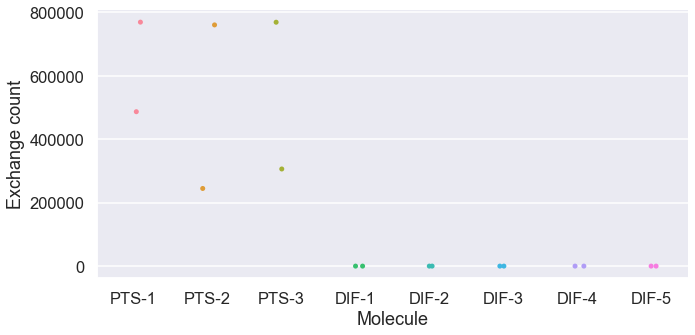

In [167]:
sns.catplot(y="Exchange count", x="Molecule", data=influx.melt(var_name="Molecule", value_name="Exchange count"), aspect=2)

In [168]:
influx.sum(axis=1)

0    1038347
1    2299748
dtype: int64

In [169]:
exchanges = pd.DataFrame(fba['estimated_exchange_dmdt'])
exchanges['GLC[p]']

0   -1038410
1   -2299837
Name: GLC[p], dtype: int64

Looks like that's all of it.

## What's the flux coming from Glc[p]?

In [170]:
sol_fluxes = pd.DataFrame(fba['solution_fluxes'])
sol_fluxes.loc[:,glucose_transport_reactions]

,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.,RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.,RXN0-7077-GLC/PROTON//Glucopyranose/PROTON.33.,RXN0-7077-GLC/PROTON//GLC/PROTON.23.,TRANS-RXN0-574-GLC//GLC.9.,TRANS-RXN0-574-GLC//Glucopyranose.19.
0,0.380083,0.191102,0.239068,-5.191708e-13,-1.357382e-12,-6.111210e-13,3.595208e-13,7.599014e-13
1,0.600535,0.593710,0.600318,-1.105098e-08,-2.340719e-08,2.395654e-08,2.071910e-07,1.597453e-07


In [171]:
pd.DataFrame(fba['estimated_fluxes']).head()

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,2,0,0,2,-7,0,0,0,...,0,27726,-33845,6119,0,0,-3,0,-1,1971173
1,-12,-17,88,16,9,-1,0,-19,0,-1,...,5,27723,-33851,6116,35,-5,-2,75,55,7128364


# Hmm

In [172]:
for reaction in stoichiometry:
    if 'CPD-564[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

ADENOSYLHOMOCYSTEINE-NUCLEOSIDASE-RXN
{'ADENOSYL-HOMO-CYS[c]': -1, 'WATER[c]': -1, 'CPD-564[c]': 1, 'ADENINE[c]': 1}
[-1, 693]
RIBOSYLHOMOCYSTEINASE-RXN
{'CPD-564[c]': -1, 'HOMO-CYS[c]': 1, 'DIHYDROXYPENTANEDIONE[c]': 1}
[-1, 719]
TRANS-RXN0-265-CPD-564//CPD-564.17.
{'CPD-564[c]': -1, 'CPD-564[p]': 1}
[0, -10]


In [173]:
for reaction in stoichiometry:
    if 'DIHYDROXYPENTANEDIONE[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RIBOSYLHOMOCYSTEINASE-RXN
{'CPD-564[c]': -1, 'HOMO-CYS[c]': 1, 'DIHYDROXYPENTANEDIONE[c]': 1}
[-1, 719]
RXN-10015
{'DIHYDROXYPENTANEDIONE[c]': -1, 'CPD-10773[c]': 1}
[0, 4]
RXN-10016
{'DIHYDROXYPENTANEDIONE[c]': -1, 'CPD-10775[c]': 1}
[0, -3]
RXN0-5461
{'DIHYDROXYPENTANEDIONE[c]': -1, 'ATP[c]': -1, 'CPD-10551[c]': 1, 'ADP[c]': 1, 'PROTON[c]': 1}
[-1, 714]


In [174]:
for reaction in stoichiometry:
    if 'CPD-10551[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RXN-15216
{'CPD-10551[c]': -1, 'CPD0-2467[c]': 1}
[-1, 712]
RXN0-5461
{'DIHYDROXYPENTANEDIONE[c]': -1, 'ATP[c]': -1, 'CPD-10551[c]': 1, 'ADP[c]': 1, 'PROTON[c]': 1}
[-1, 714]


In [175]:
for reaction in stoichiometry:
    if 'CPD0-2467[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RXN-15216
{'CPD-10551[c]': -1, 'CPD0-2467[c]': 1}
[-1, 712]
RXN-15943 (reverse)
{'DIHYDROXY-ACETONE-PHOSPHATE[c]': 1, 'ACETYL-COA[c]': 1, 'CPD0-2467[c]': -1, 'CO-A[c]': -1}
[-1, 697]
RXN0-6720
{'CPD0-2467[c]': -1, 'WATER[c]': -1, 'CPD0-2468[c]': 1}
[0, 7]


## Get top fluxes

In [176]:
top_fluxes = list(fluxes.sort_values(axis=1, by=49, ascending=False).columns[0:50])
top_fluxes

KeyError: 49

In [177]:
df3[df3['index'].isin(top_fluxes)]

NameError: name 'top_fluxes' is not defined

# Check target goal

In [178]:
fba['estimated_fluxes']['maintenance_reaction']

[1971173, 7128364]

## Network structure

In [179]:
s_matrix

array([[-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [180]:
stoichiometry

array([{'reaction id': '1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN', 'stoichiometry': {'ACYL-SN-GLYCEROL-3P[c]': -1, 'ACYL-ACP[c]': -1, 'L-PHOSPHATIDATE[c]': 1, 'ACP[c]': 1}, 'is reversible': False, 'enzyme': ['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]']},
       {'reaction id': '1.1.1.127-RXN', 'stoichiometry': {'2-DEHYDRO-3-DEOXY-D-GLUCONATE[c]': -1, 'NAD[c]': -1, 'CPD-343[c]': 1, 'NADH[c]': 1, 'PROTON[c]': 1}, 'is reversible': True, 'enzyme': ['KDUD-MONOMER[c]']},
       {'reaction id': '1.1.1.215-RXN (reverse)', 'stoichiometry': {'GLUCONATE[c]': 1, 'NADP[c]': 1, 'CPD-377[c]': -1, 'NADPH[c]': -1, 'PROTON[c]': -1}, 'is reversible': False, 'enzyme': ['CPLX0-235[c]']},
       ...,
       {'reaction id': 'YIAE2-RXN (reverse)', 'stoichiometry': {'CPD-377[c]': 1, 'NADPH[c]': 1, 'PROTON[c]': 1, 'L-IDONATE[c]': -1, 'NADP[c]': -1}, 'is reversible': False, 'enzyme': []},
       {'reaction id': 'glycogen-monomer-extension', 'stoichiometry': {'glycogen-monomer[c]': 1, 'ADP-D-GLUCOSE[c]': -1, 'ADP[c]'

In [181]:
G = nx.Graph()

for reaction in stoichiometry:
    for metabolite in list(reaction['stoichiometry'].keys()):
        G.add_node(metabolite)

    for reactant in list(reaction['stoichiometry'].keys()):
        if reaction['stoichiometry'][reactant] < 0:
            for product in list(reaction['stoichiometry'].keys()):
                if reaction['stoichiometry'][product] > 0:
                    G.add_edge(reactant, product)
                    
    # if i>1000:
    #     break
            

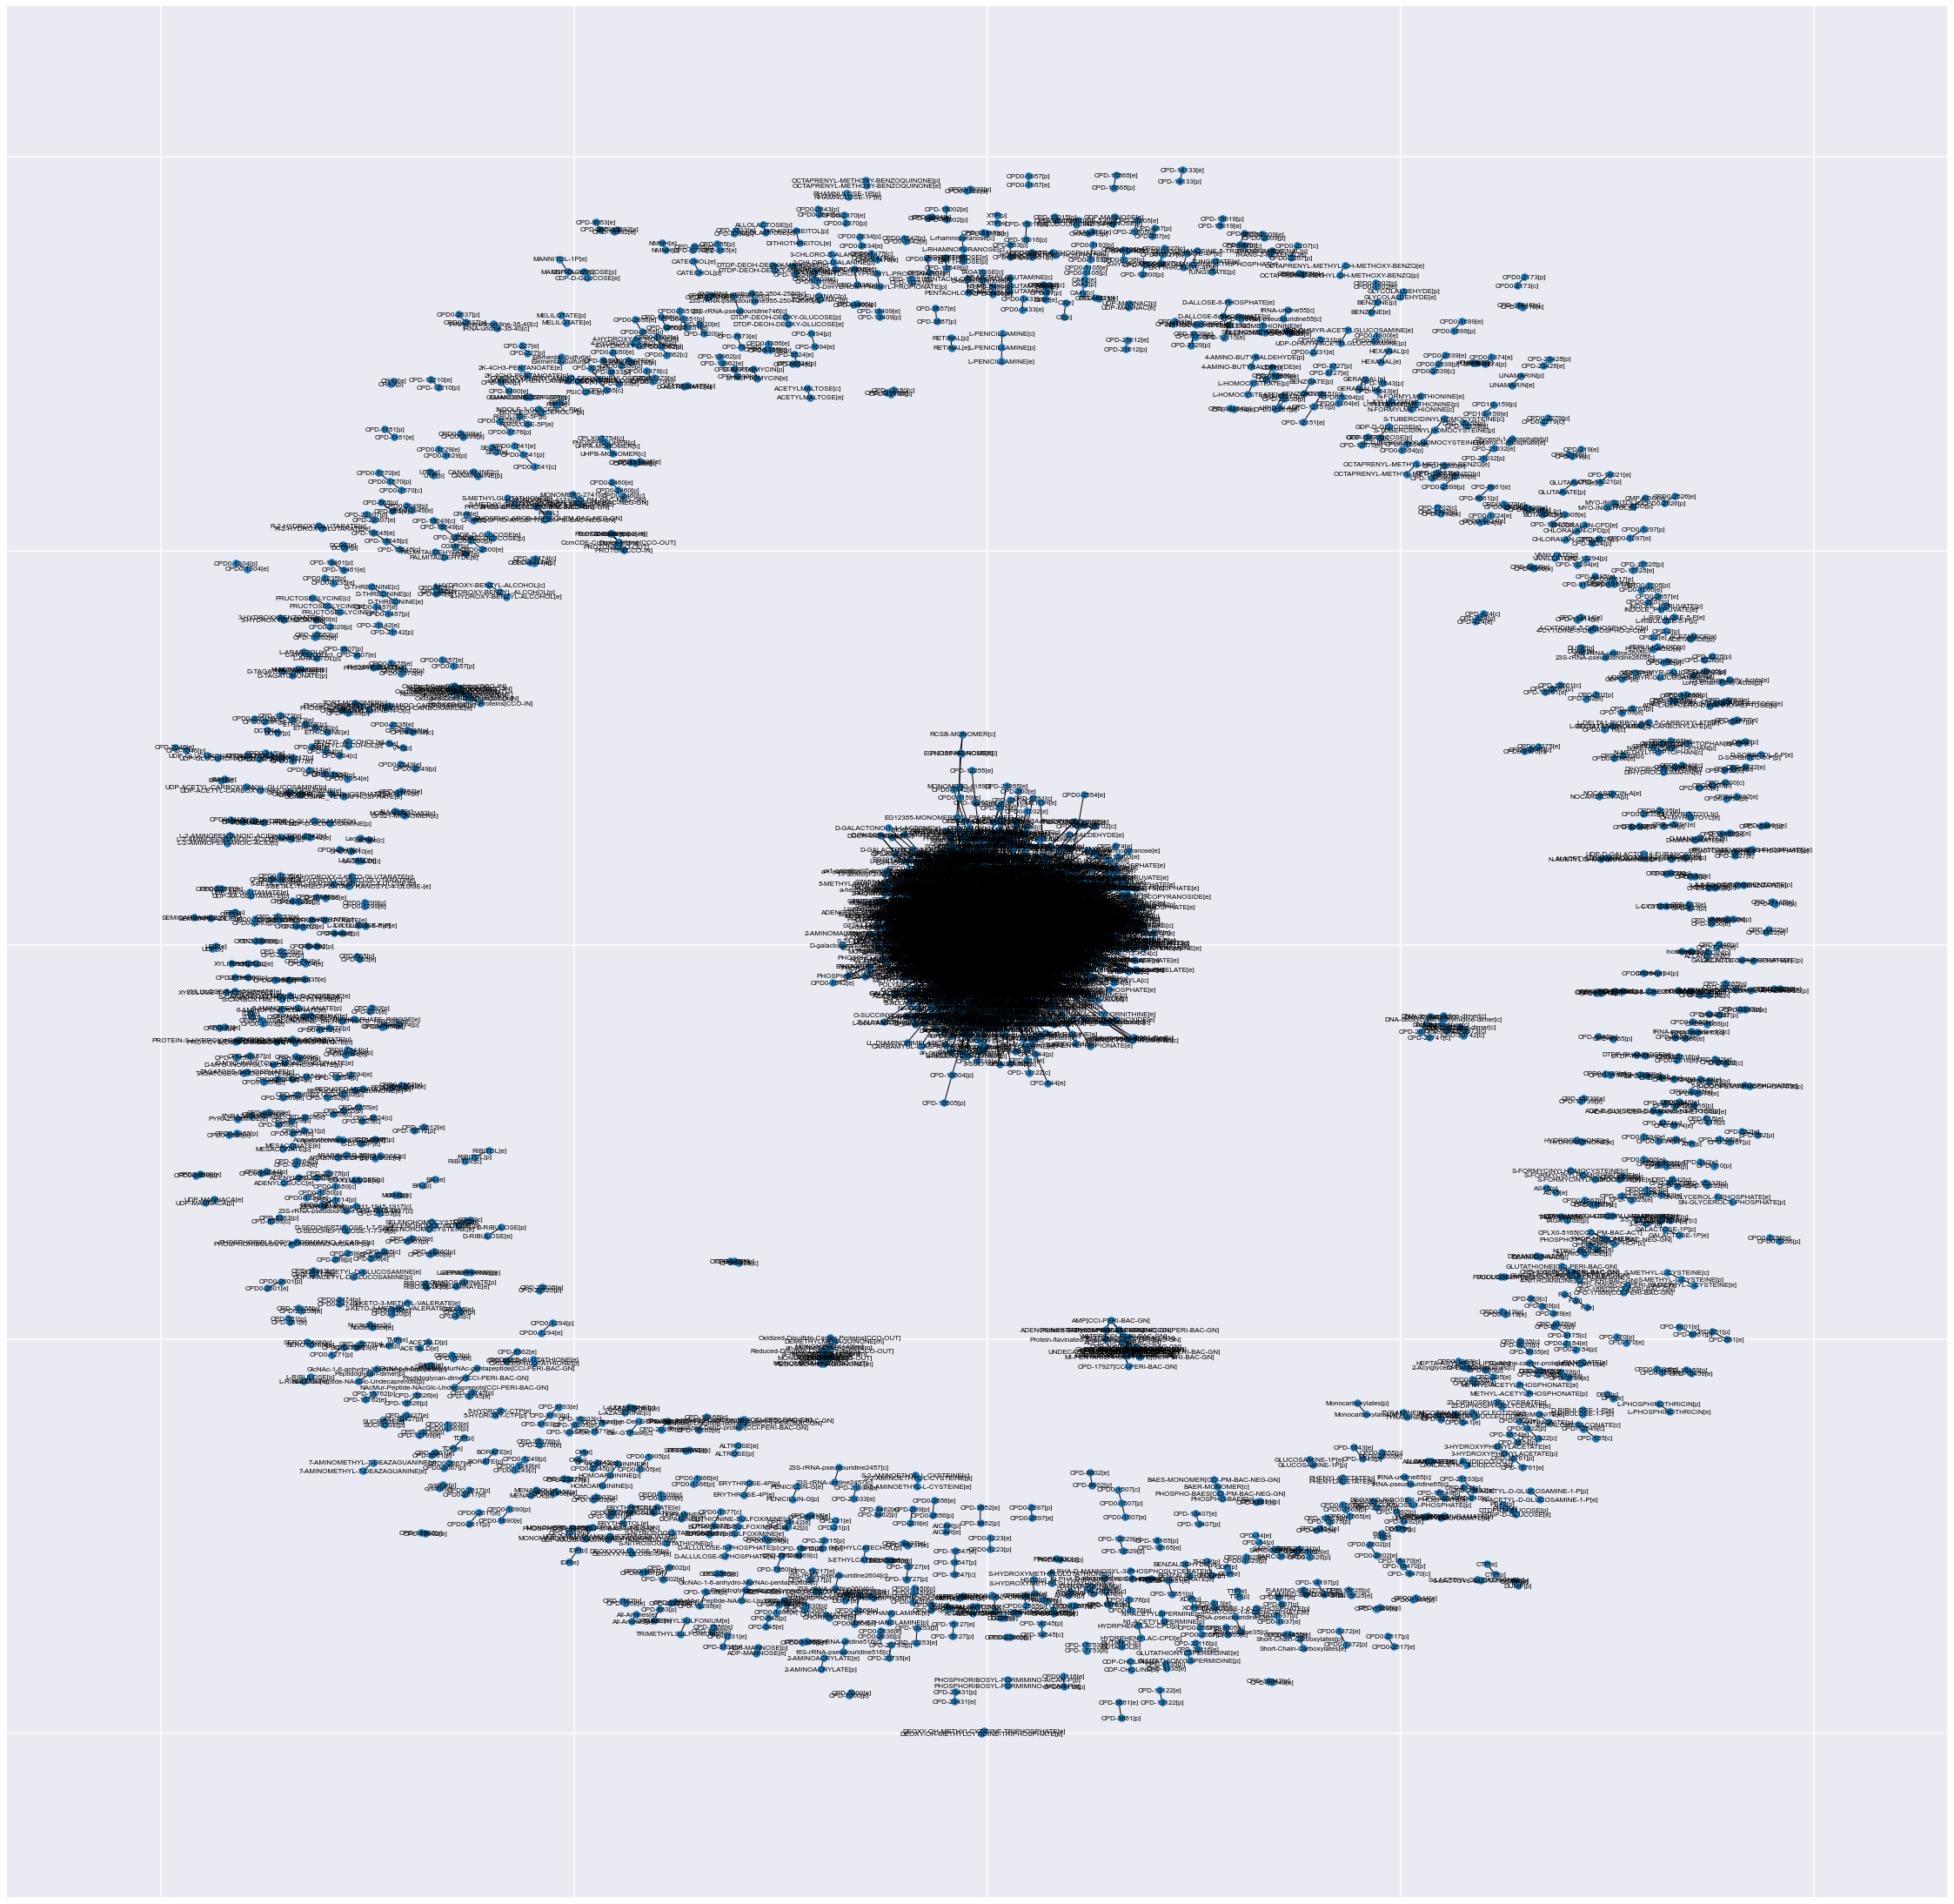

In [182]:
plt.figure(figsize=[40,40])

nx.draw_networkx(G, pos=nx.spring_layout(G), labels=None, node_size=50, with_labels=True, font_size=8)

In [183]:
cnt = 0
unconnected_metabolites = set()

for subgraph in [G.subgraph(c) for c in nx.connected_components(G)]:
    if subgraph.size() < 4: 
        unconnected_metabolites.update(subgraph.nodes())
        
cnt

0

In [184]:
len(unconnected_metabolites)

1612

In [185]:
G.nodes()

NodeView(('ACYL-SN-GLYCEROL-3P[c]', 'ACYL-ACP[c]', 'L-PHOSPHATIDATE[c]', 'ACP[c]', '2-DEHYDRO-3-DEOXY-D-GLUCONATE[c]', 'NAD[c]', 'CPD-343[c]', 'NADH[c]', 'PROTON[c]', 'GLUCONATE[c]', 'NADP[c]', 'CPD-377[c]', 'NADPH[c]', 'GALACTITOL-1-PHOSPHATE[c]', 'CPD-15826[c]', 'CPD-13118[c]', 'GDP-4-DEHYDRO-6-DEOXY-D-MANNOSE[c]', '25-DIDEHYDRO-D-GLUCONATE[c]', 'LACTALD[c]', 'METHYL-GLYOXAL[c]', 'MAL[c]', 'CARBON-DIOXIDE[c]', 'PYRUVATE[c]', 'CPD-660[c]', 'Red-Thioredoxin[c]', 'Alkyl-Hydro-Peroxides[c]', 'Ox-Thioredoxin[c]', 'Alcohols[c]', 'WATER[c]', '2-3-DIHYDROXYPHENYL-PROPIONATE[c]', 'OXYGEN-MOLECULE[c]', 'CPD-157[c]', 'TRANS-D2-ENOYL-ACP[c]', '5-METHYL-THF[c]', 'METHYLENE-THF[c]', 'CPD-1302[c]', 'CPD-12996[c]', 'A-REDUCED-TORY-PROTEIN[p]', 'NITRITE[p]', 'PROTON[p]', 'AMMONIUM[p]', 'an-oxidized-TorY-protein[p]', 'WATER[p]', 'Cytochromes-C-Reduced[p]', 'Cytochromes-C-Oxidized[p]', 'Cytochromes-C550-Red[p]', 'Cytochromes-C550-Ox[p]', 'Cytochromes-C552-Red[p]', 'Cytochromes-C552-Ox[p]', 'Cytochromes